In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
import statsmodels.formula.api as sm


# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [26]:
# The numpy.random.seed() makes the random numbers predictable and 
# is used for reproducibility
np.random.seed(123)

In [97]:
location = r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\breast-cancer-diag.csv"

In [98]:
# load the training data from glass data set
data = pd.read_csv(location)
data.shape

(569, 33)

In [99]:
# Removing the Id and the Unnamed columns

data = data.iloc[:,1:-1]

In [ ]:
data.shape

In [100]:
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [102]:
# encode the Categorical Variable (only the first one is of type object)

label_encoder = LabelEncoder()

data.iloc[:, 0] = label_encoder.fit_transform(data.iloc[:, 0]).astype('float64')

In [103]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


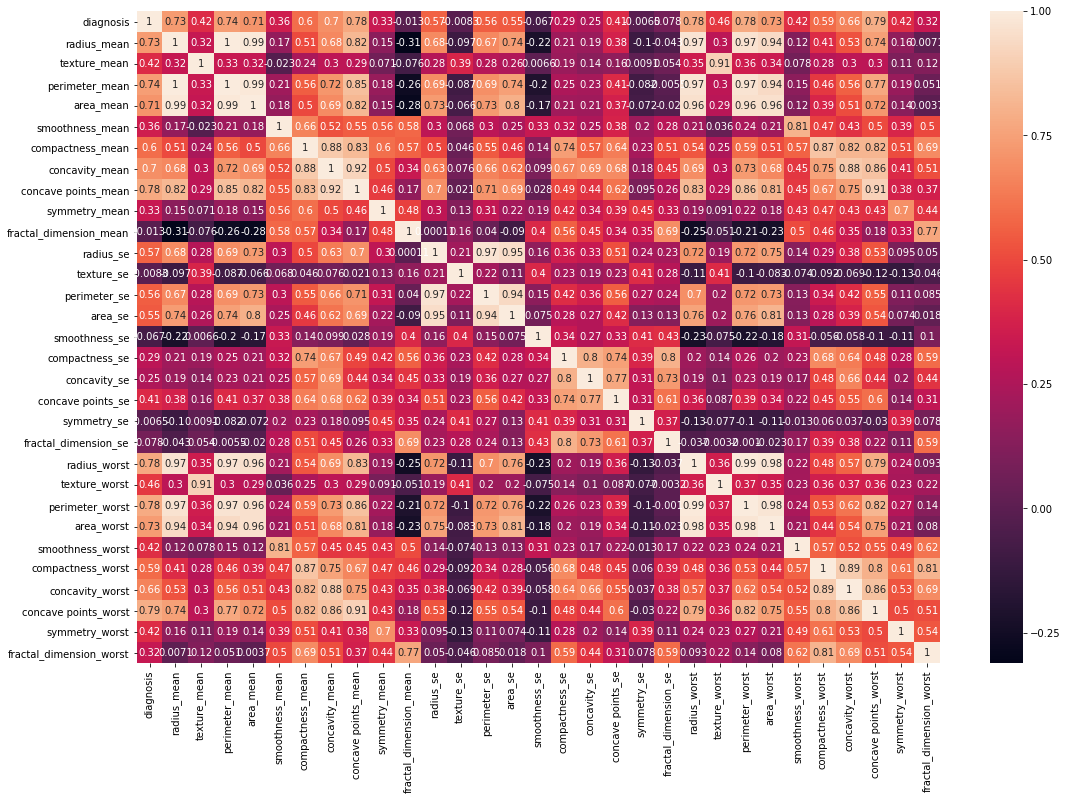

In [104]:
# Generating the correlation matrix
corr = data.corr()

# Generating the correlation heat-map
plt.figure(figsize=(18, 12))
sns.heatmap(corr, annot=True)

In [105]:
# Next, we compare the correlation between features and remove one of two features 
# that have a correlation higher than 0.9

In [106]:
corr.shape

(31, 31)

In [107]:
columns = np.full((corr.shape[0],), True, dtype=bool)
columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [108]:
# 
columns = np.full((corr.shape[0],), True, dtype=bool)

for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
                
selected_columns = data.columns[columns]

# final data 
data = data[selected_columns]

In [109]:
# Now, the dataset has only those columns with correlation less than 0.9
data.shape

(569, 21)

In [110]:
data.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,...,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,1.0,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,...,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,1.0,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,...,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,1.0,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,...,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,1.0,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,...,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


In [40]:
# Selecting columns based on p-value

In [90]:
# Next we will be selecting the columns based on how they affect the p-value. 
# remove the column diagnosis because it is the target column 

In [91]:
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    
    for i in range(0, numVars):
        
        regressor_OLS = sm.OLS(Y, x).fit()
        
        maxVar = max(regressor_OLS.pvalues).astype(float)
        
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [92]:
selected_columns = selected_columns[1:].values

SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:, 1:].values, 
                                                     data.iloc[:, 0].values, 
                                                     SL, 
                                                     selected_columns)
print('Selected columns : ', columns)

Selected columns :  [ True  True  True False False  True  True  True False  True  True  True
  True False False  True  True  True  True  True  True False False False
 False  True  True  True False  True  True]


In [94]:
selected_columns

array(['radius_mean', 'texture_mean', 'concavity_mean',
       'fractal_dimension_mean', 'radius_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'], dtype=object)

In [44]:
# Moving the result to a new Dataframe

result = pd.DataFrame()
result['diagnosis'] = data.iloc[:, 0]

In [45]:
# Creating a Dataframe with the columns selected using the p-value and correlation

data = pd.DataFrame(data = data_modeled, columns = selected_columns)

In [46]:
data.shape

(569, 13)

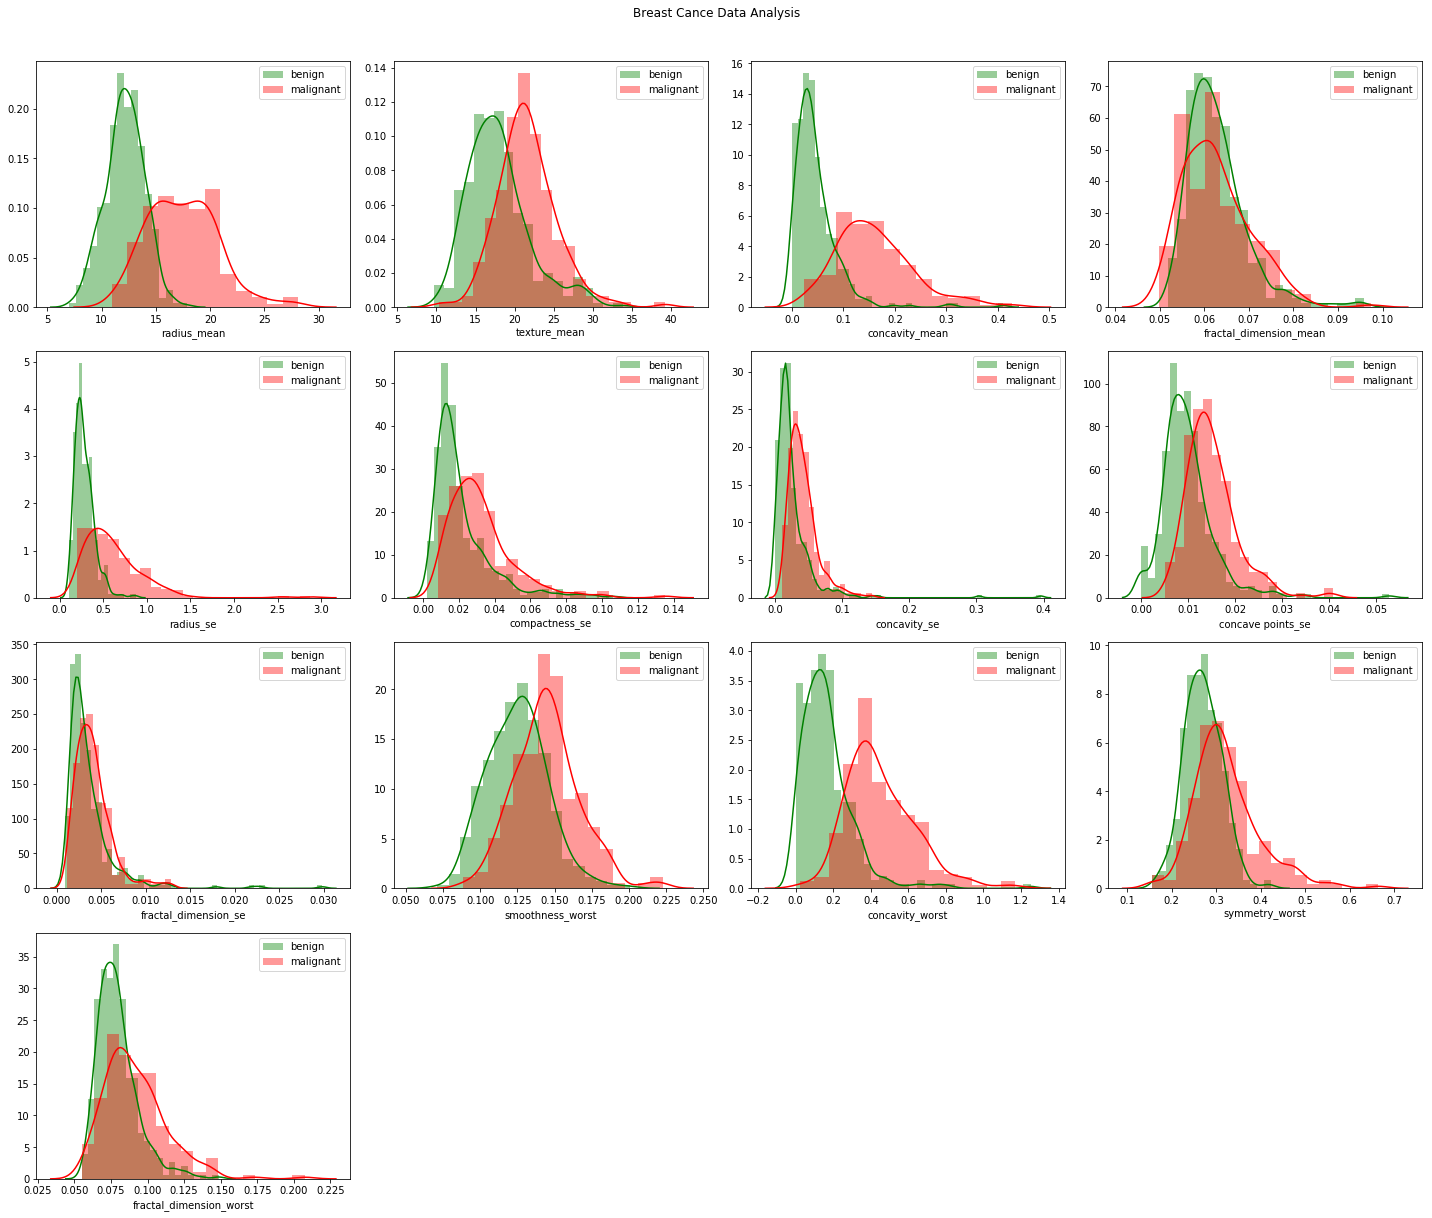

In [47]:
# Visualizing the selected features
# Plotting the data to visualize their distribution
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(data[i][result['diagnosis']==0], color='g', label = 'benign')
    sns.distplot(data[i][result['diagnosis']==1], color='r', label = 'malignant')
    plt.legend(loc='best')
fig.suptitle('Breast Cance Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [48]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.2)

In [49]:
# Building a model with the selected features
# We are using a Support Vector Classifier with a Gaussian Kernel to make the predictions. 
# We will train the model on our train data and calculate the accuracy of the model using 
# the test data

In [50]:
svc=SVC() # The default kernel used by SVC is the gaussian kernel
svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [51]:
# Making the predictions and calculating the accuracy

y_pred = svc.predict(x_test)

In [52]:
metrics.accuracy_score(y_test, y_pred)

0.9298245614035088

In [53]:
metrics.confusion_matrix(y_test, y_pred)

array([[73,  0],
       [ 8, 33]], dtype=int64)

In [54]:
# Building a model without feature selection and comparing the results

In [55]:
# load the training data from glass data set
data = pd.read_csv(location)
data.shape

(569, 33)

In [56]:
result['diagnosis'] = data.iloc[:,1]
data = data.iloc[:,2:-1]                         
label_encoder = LabelEncoder()              
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')    

In [57]:
x_train, x_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.2)      
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

In [34]:
confusion_matrix(y_test, y_pred)

array([[80,  0],
       [34,  0]], dtype=int64)

In [35]:
metrics.accuracy_score(y_test, y_pred)

0.7017543859649122